# Final Complex Model

In [5]:
import pandas as pd, numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path

pd.set_option('display.float_format', lambda x: f'{x:,.4f}')

In [6]:
path = '/Users/Marcy_Student/Desktop/Marcy-Modules/Mod6/final-project/data/complex_model_data.csv'
df = pd.read_csv(path)
df

,Unnamed: 0,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,...,total_injury_death_flag,is_government,boroname_Brooklyn,boroname_Manhattan,boroname_Queens,boroname_Staten Island,interaction_is_government_boroname_Brooklyn,interaction_is_government_boroname_Manhattan,interaction_is_government_boroname_Queens,interaction_is_government_boroname_Staten Island
0,0,2022-01-01,7,NaN,NaN,40.7715,-73.9182,"(40.771477, -73.91824)",HOYT AVENUE NORTH,NaN,...,0,0,False,False,True,False,0,0,0,0
1,3,2022-01-01,5,NaN,NaN,40.7469,-73.8487,"(40.74693, -73.84866)",GRAND CENTRAL PKWY,NaN,...,1,0,False,False,True,False,0,0,0,0
2,4,2022-01-01,1,NaN,NaN,40.8192,-73.9604,"(40.819157, -73.96038)",HENRY HUDSON PARKWAY,NaN,...,0,1,False,True,False,False,0,1,0,0
3,5,2022-01-01,16,BRONX,"10,454.0000",40.8061,-73.9180,"(40.806107, -73.91799)",NaN,NaN,...,0,0,False,False,False,False,0,0,0,0
4,6,2022-01-01,13,QUEENS,"11,373.0000",40.7427,-73.8764,"(40.742737, -73.87643)",NaN,NaN,...,0,1,False,False,True,False,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340281,369996,2025-12-02,10,BRONX,"10,475.0000",40.8847,-73.8313,"(40.884712, -73.8313)",DYRE AVE,BOSTON RD,...,1,0,False,False,False,False,0,0,0,0
340282,369997,2025-12-02,19,BRONX,"10,451.0000",40.8147,-73.9221,"(40.814716, -73.92207)",NaN,NaN,...,0,0,False,False,False,False,0,0,0,0
340283,369998,2025-12-02,20,BROOKLYN,"11,219.0000",40.6390,-74.0004,"(40.639004, -74.0004)",NaN,NaN,...,1,0,True,False,False,False,0,0,0,0
340284,369999,2025-12-02,5,NaN,NaN,40.7100,-73.9893,"(40.70996, -73.989334)",FDR DRIVE,NaN,...,1,0,False,True,False,False,0,0,0,0


In [7]:
df.columns

Index(['Unnamed: 0', 'crash_date', 'crash_time', 'borough', 'zip_code',
       'latitude', 'longitude', 'location', 'on_street_name',
       'cross_street_name', 'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5',
       'month', 'season', 'is_electric', 'total_injury_death',
       'total_injury_death_flag', 'is_government', 'boroname_Brooklyn',
       'boroname_Manhattan', 'boroname_Queens', 'boroname_Staten Island',
       'interaction_

In [8]:
df_enc = pd.get_dummies(df, columns=['season'], drop_first=True)

In [9]:
y = df_enc['total_injury_death_flag']
X = sm.add_constant((df_enc.iloc[:, [34,35,36,37,38,43,44,45]].astype(int)))
display(y)
display(X)

0         0
1         1
2         0
3         0
4         0
         ..
340281    1
340282    0
340283    1
340284    1
340285    1
Name: total_injury_death_flag, Length: 340286, dtype: int64

,const,is_government,boroname_Brooklyn,boroname_Manhattan,boroname_Queens,boroname_Staten Island,season_Spring,season_Summer,season_Winter
0,1.0000,0,0,0,1,0,0,0,1
1,1.0000,0,0,0,1,0,0,0,1
2,1.0000,1,0,1,0,0,0,0,1
3,1.0000,0,0,0,0,0,0,0,1
4,1.0000,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
340281,1.0000,0,0,0,0,0,0,0,1
340282,1.0000,0,0,0,0,0,0,0,1
340283,1.0000,0,1,0,0,0,0,0,1
340284,1.0000,0,0,1,0,0,0,0,1


In [10]:
df_enc.columns

Index(['Unnamed: 0', 'crash_date', 'crash_time', 'borough', 'zip_code',
       'latitude', 'longitude', 'location', 'on_street_name',
       'cross_street_name', 'off_street_name', 'number_of_persons_injured',
       'number_of_persons_killed', 'number_of_pedestrians_injured',
       'number_of_pedestrians_killed', 'number_of_cyclist_injured',
       'number_of_cyclist_killed', 'number_of_motorist_injured',
       'number_of_motorist_killed', 'contributing_factor_vehicle_1',
       'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3',
       'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
       'collision_id', 'vehicle_type_code_1', 'vehicle_type_code_2',
       'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5',
       'month', 'is_electric', 'total_injury_death', 'total_injury_death_flag',
       'is_government', 'boroname_Brooklyn', 'boroname_Manhattan',
       'boroname_Queens', 'boroname_Staten Island',
       'interaction_is_governm

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, 
                                                    stratify=y,
                                                        random_state=40)

In [12]:
# 3. Final, Complex Model
model = LogisticRegression(class_weight='balanced').fit(x_train, y_train)

pred_simple = model.predict(x_test)

mae_simple = mean_absolute_error(y_test, pred_simple)
rmse_simple = mean_squared_error(y_test, pred_simple)

print(f"MAE: {mae_simple:.2f} ———— RMSE: {rmse_simple:.2f}")
print(f"Final Model Accuracy: {accuracy_score(y_test, (pred_simple >= 0.5).astype(int))}")

# our error is smaller than our baseline :)

MAE: 0.48 ———— RMSE: 0.48
Final Model Accuracy: 0.5156534686440843


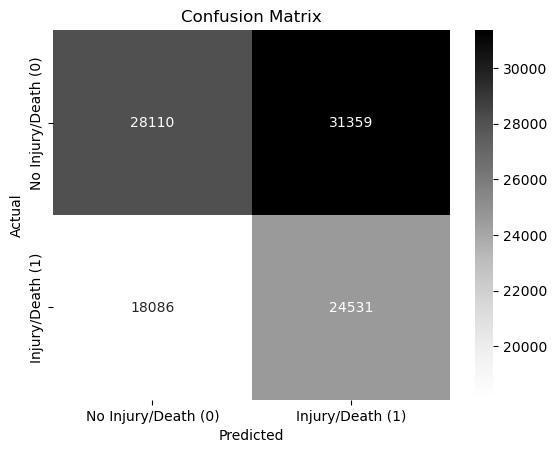

                     precision    recall  f1-score   support

No Injury/Death (0)       0.61      0.47      0.53     59469
   Injury/Death (1)       0.44      0.58      0.50     42617

           accuracy                           0.52    102086
          macro avg       0.52      0.52      0.52    102086
       weighted avg       0.54      0.52      0.52    102086



In [13]:
# confusion matrix
cm = confusion_matrix(y_test, pred_simple)

# visualizing with heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys',
            xticklabels=['No Injury/Death (0)', 'Injury/Death (1)'],
            yticklabels=['No Injury/Death (0)', 'Injury/Death (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# report
print(classification_report(y_test, pred_simple, target_names=['No Injury/Death (0)', 'Injury/Death (1)']))



In [14]:
df_enc

,Unnamed: 0,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,...,boroname_Manhattan,boroname_Queens,boroname_Staten Island,interaction_is_government_boroname_Brooklyn,interaction_is_government_boroname_Manhattan,interaction_is_government_boroname_Queens,interaction_is_government_boroname_Staten Island,season_Spring,season_Summer,season_Winter
0,0,2022-01-01,7,NaN,NaN,40.7715,-73.9182,"(40.771477, -73.91824)",HOYT AVENUE NORTH,NaN,...,False,True,False,0,0,0,0,False,False,True
1,3,2022-01-01,5,NaN,NaN,40.7469,-73.8487,"(40.74693, -73.84866)",GRAND CENTRAL PKWY,NaN,...,False,True,False,0,0,0,0,False,False,True
2,4,2022-01-01,1,NaN,NaN,40.8192,-73.9604,"(40.819157, -73.96038)",HENRY HUDSON PARKWAY,NaN,...,True,False,False,0,1,0,0,False,False,True
3,5,2022-01-01,16,BRONX,"10,454.0000",40.8061,-73.9180,"(40.806107, -73.91799)",NaN,NaN,...,False,False,False,0,0,0,0,False,False,True
4,6,2022-01-01,13,QUEENS,"11,373.0000",40.7427,-73.8764,"(40.742737, -73.87643)",NaN,NaN,...,False,True,False,0,0,1,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340281,369996,2025-12-02,10,BRONX,"10,475.0000",40.8847,-73.8313,"(40.884712, -73.8313)",DYRE AVE,BOSTON RD,...,False,False,False,0,0,0,0,False,False,True
340282,369997,2025-12-02,19,BRONX,"10,451.0000",40.8147,-73.9221,"(40.814716, -73.92207)",NaN,NaN,...,False,False,False,0,0,0,0,False,False,True
340283,369998,2025-12-02,20,BROOKLYN,"11,219.0000",40.6390,-74.0004,"(40.639004, -74.0004)",NaN,NaN,...,False,False,False,0,0,0,0,False,False,True
340284,369999,2025-12-02,5,NaN,NaN,40.7100,-73.9893,"(40.70996, -73.989334)",FDR DRIVE,NaN,...,True,False,False,0,0,0,0,False,False,True


In [15]:
# converting dummy columns to int to transfer
cols = ['boroname_Brooklyn', 'boroname_Manhattan',	'boroname_Queens', 'boroname_Staten Island', 'season_Spring', 'season_Summer', 'season_Winter']
df_enc[cols] = df_enc[cols].apply(lambda col: col.astype(int))

In [19]:
# filtered for only columns the model needs
df_final = df_enc[['total_injury_death_flag', 'is_government', 'boroname_Brooklyn', 'boroname_Manhattan',	'boroname_Queens', 'boroname_Staten Island', 'season_Spring', 'season_Summer', 'season_Winter', 'latitude', 'longitude']]
df_final

,total_injury_death_flag,is_government,boroname_Brooklyn,boroname_Manhattan,boroname_Queens,boroname_Staten Island,season_Spring,season_Summer,season_Winter,latitude,longitude
0,0,0,0,0,1,0,0,0,1,40.7715,-73.9182
1,1,0,0,0,1,0,0,0,1,40.7469,-73.8487
2,0,1,0,1,0,0,0,0,1,40.8192,-73.9604
3,0,0,0,0,0,0,0,0,1,40.8061,-73.9180
4,0,1,0,0,1,0,0,0,1,40.7427,-73.8764
...,...,...,...,...,...,...,...,...,...,...,...
340281,1,0,0,0,0,0,0,0,1,40.8847,-73.8313
340282,0,0,0,0,0,0,0,0,1,40.8147,-73.9221
340283,1,0,1,0,0,0,0,0,1,40.6390,-74.0004
340284,1,0,0,1,0,0,0,0,1,40.7100,-73.9893


In [20]:
df_final.to_csv('../data/complex_model_data.csv.zip', compression='zip')